In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [10]:
import pickle
import numpy as np
import pylab as plt

# Make sure we can find lassi-analysis
import sys
sys.path.append('/home/scratch/psalas/LASSI/lassi-analysis_v2')

from analysis.March2020.zernike import plot_zin_zout, make_aperture_efficiency, aperture_efficiency_residuals

In [54]:
def order_zin_zout(zFitDictFile):
    
    zFitDict = pickle.load( open(zFitDictFile, "rb"), encoding='bytes')
    print(zFitDict['header'])
    
    # Extract information from the dictionaries and update wrong values.
    iz = np.zeros(len(zFitDict.keys()), dtype=int)
    izv = np.zeros(len(zFitDict.keys()), dtype=np.float)
    izvas = np.zeros(len(zFitDict.keys()), dtype=np.float)
    zobs = np.zeros(len(zFitDict.keys()), dtype=np.float)
    zobswls = np.zeros(len(zFitDict.keys()), dtype=np.float)
    scan = np.zeros(len(zFitDict.keys()), dtype=int)

    for i,k in enumerate(sorted(list(zFitDict.keys())[1:])):

        scan[i] = k

        iz[i] = zFitDict[k]['input zernike']
        izv[i] = zFitDict[k]['input zernike value']
        izvas[i] = zFitDict[k]['active surface zernike value']
        zobs[i] = zFitDict[k]['recovered zernike'][iz[i]]
        try:
            zobswls[i] = zFitDict[k]['recovered zernike wls'][iz[i]]
        except KeyError:
            zobswls[i] = np.nan
            
    mask = (iz == 0)
    iz = iz[~mask]
    izv = izv[~mask]
    izvas = izvas[~mask]
    zobs = zobs[~mask]
    zobswls = zobswls[~mask]
    scan = scan[~mask]
    pdiff = (zobs*1000. - izv*1e-3)/(izv*1e-3)*100.
    
    return iz, izv, izvas, zobs, zobswls

In [9]:
%%time
zindxs = [4, 7, 13]
zcoefs = np.arange(0., 500., 10.)*1e-6 # m
eps_tot, eta_tot = make_aperture_efficiency(zindxs, zcoefs, n=256)

CPU times: user 44.5 s, sys: 18.1 ms, total: 44.5 s
Wall time: 44.5 s


In [40]:
mask = (iz == 4) & (izv == 500.)
zobs[mask]*1e6

array([318.4263476 , 437.46174014, 671.52752231])

{'scan0': 16, 'scanf': 125, 'nZern': 37, 'signal_registration': False, 'sigma_clip_diff': False, 'kernel_size': 1, 'do_replace_nans': False, 'guess': [60.0, 0.0, 0.0, -50.0, 0.0, 0.0], 'maskRadius': 50, 'fixed_reference': False, 'reference_scan_file': '/home/scratch/psalas/LASSI/gpus/output/2020_03_16_02:21:06.ptx.csv', 'signal_type': b'SIGNAL', 'sigma': 5}


<IPython.core.display.Javascript object>


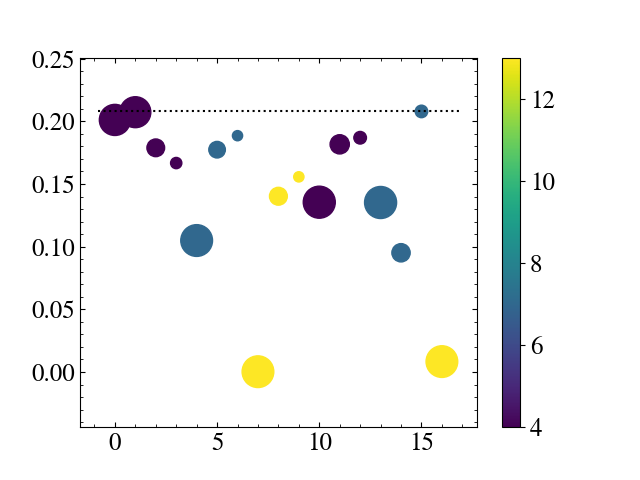

In [57]:
iz, izv, izvas, zobs, zobswls = order_zin_zout('zFitDict_0c.pickle')
#plot_zin_zout(zobs, izvas, iz)
eta_res = aperture_efficiency_residuals(zindxs, zcoefs*1e6, eta_tot, iz, izvas, zobswls*1e6)
plt.figure()
sc = plt.scatter(np.arange(len(eta_res)), eta_res, c=iz, s=izvas)
plt.plot(plt.gca().get_xlim(), [np.max(eta_tot)]*2, 'k:')
plt.colorbar()
plt.minorticks_on()
plt.tick_params('both', direction='in', which='both', top=True, right=True, left=True, bottom=True)

{'scan0': 16, 'scanf': 125, 'nZern': 37, 'signal_registration': False, 'sigma_clip_diff': False, 'kernel_size': 1, 'do_replace_nans': False, 'guess': [60.0, 0.0, 0.0, -50.0, 0.0, 0.0], 'maskRadius': 50, 'fixed_reference': True, 'reference_scan_file': '/home/scratch/psalas/LASSI/gpus/output/2020_03_16_05:22:24.ptx.csv', 'signal_type': b'SIGNAL', 'sigma': 3, 'radial_mask': False}


<IPython.core.display.Javascript object>


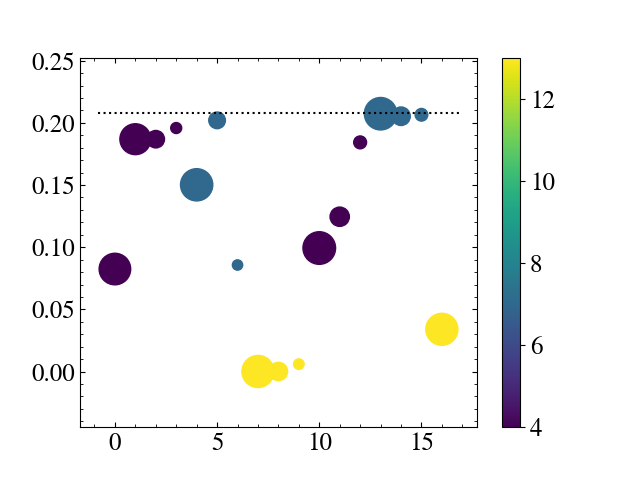

In [61]:
iz, izv, izvas, zobs, zobswls = order_zin_zout('zFitDict_2c.pickle')
#plot_zin_zout(zobs, izvas, iz)
eta_res = aperture_efficiency_residuals(zindxs, zcoefs*1e6, eta_tot, iz, izvas, zobs*1e6)
plt.figure()
sc = plt.scatter(np.arange(len(eta_res)), eta_res, c=iz, s=izvas)
plt.plot(plt.gca().get_xlim(), [np.max(eta_tot)]*2, 'k:')
plt.colorbar()
plt.minorticks_on()
plt.tick_params('both', direction='in', which='both', top=True, right=True, left=True, bottom=True)

{'scan0': 16, 'scanf': 125, 'nZern': 37, 'signal_registration': False, 'sigma_clip_diff': False, 'kernel_size': 1, 'do_replace_nans': False, 'guess': [60.0, 0.0, 0.0, -50.0, 0.0, 0.0], 'maskRadius': 49.5, 'fixed_reference': False, 'reference_scan': None, 'signal_type': b'SIGNAL', 'sigma': 3.5}


<IPython.core.display.Javascript object>


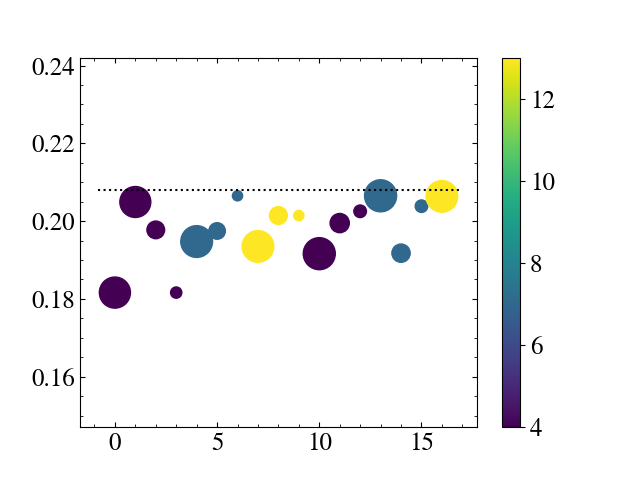

In [42]:
iz, izv, izvas, zobs = order_zin_zout('zFitDict_25b.pickle')
#plot_zin_zout(zobs, izvas, iz)
eta_res = aperture_efficiency_residuals(zindxs, zcoefs*1e6, eta_tot, iz, izvas, zobs*1e6)
plt.figure()
sc = plt.scatter(np.arange(len(eta_res)), eta_res, c=iz, s=izvas)
plt.plot(plt.gca().get_xlim(), [np.max(eta_tot)]*2, 'k:')
plt.colorbar()
plt.minorticks_on()
plt.tick_params('both', direction='in', which='both', top=True, right=True, left=True, bottom=True)

<IPython.core.display.Javascript object>


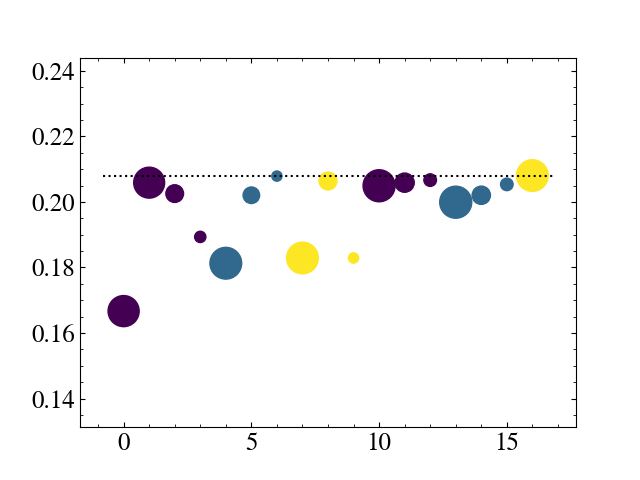

<IPython.core.display.Javascript object>


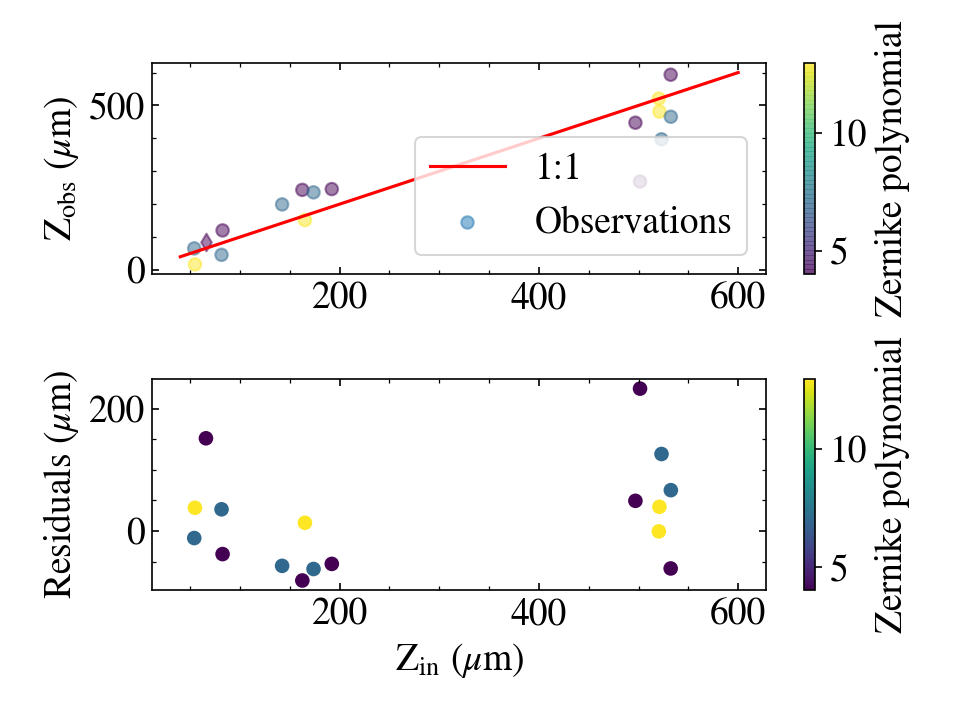

In [32]:
iz, izv, izvas, zobs = order_zin_zout('zFitDict_50b.pickle')
eta_res = aperture_efficiency_residuals(zindxs, zcoefs*1e6, eta_tot, iz, izvas, zobs*1e6)
plt.figure()
plt.scatter(np.arange(len(eta_res)), eta_res, c=iz, s=izvas)
plt.plot(plt.gca().get_xlim(), [np.max(eta_tot)]*2, 'k:')
plt.minorticks_on()
plt.tick_params('both', direction='in', which='both', top=True, right=True, left=True, bottom=True)
plot_zin_zout(zobs, izvas, iz)

In [24]:
eta_res[11]

0.19950608924037133

In [49]:
np.power(np.mean(eta_res)/np.max(eta_tot), -2.)

1.1057816014252344

In [51]:
6*1.1

6.6000000000000005